# Neural Network from Scratch for the MNIST Dataset (No ML Libraries)

In [ ]:
# necessary imports
import numpy as np
import h5py
import time
import copy
import matplotlib.pyplot as plt
from random import randint

# The h5py Filetype allows us to Save lots of Binary Data in a Single File

In [ ]:
# loading the MNIST dataset
MNIST_data = h5py.File('MNISTdata.hdf5', 'r')
x_train = np.float32(MNIST_data['x_train'][:])
y_train = np.int32(np.array(MNIST_data['y_train'][:, 0]))
x_test = np.float32(MNIST_data['x_test'][:])
y_test = np.int32(np.array(MNIST_data['y_test'][:, 0]))
MNIST_data.close()

# Designing our Neural Network using Gradient Descent


In [ ]:
# implementing the neural network

class NeuralNetwork:
    layer1 = {}
    layer2 = {}

    def __init__(self, inputsize, hiddensize, outputsize):
        # initializing parameters and biases 
        self.layer1['parameters'] = np.random.randn(hiddensize, inputsize) / np.sqrt(inputsize)
        self.layer1['bias'] = np.random.randn(hiddensize, 1) / np.sqrt(hiddensize)
        self.layer2['parameters'] = np.random.randn(outputsize, hiddensize) / np.sqrt(hiddensize)
        self.layer2['bias'] = np.random.randn(outputsize, 1) / np.sqrt(hiddensize)
        self.inputSize = inputsize
        self.hiddenSize = hiddensize
        self.outputSize = outputsize

    def activation_function(self, Z, type = 'ReLU', derivative = False):
        # ReLU Activation Function
        if derivative == True:
            return np.array([1 if i > 0 else 0 for i in np.squeeze(Z)])
        else:
            return np.array([i if i > 0 else 0 for i in np.squeeze(Z)])

    def soft_max(self, z):
        # softmax function
        return 1/sum(np.exp(z)) * np.exp(z)

    def forward_computation(self, x, y):
        # implement the forward computation, calculation of prediction list
        Z = np.matmul(self.layer1['parameters'], x).reshape((self.hiddenSize, 1)) + self.layer1['bias']
        H = np.array(self.activation_function(Z)).reshape((self.hiddenSize, 1))
        U = np.matmul(self.layer2['parameters'], H).reshape((self.outputSize, 1)) + self.layer2['bias']
        predictions = np.squeeze(self.soft_max(U))
        
        forwardProp = {
            'Z':Z,
            'H':H,
            'U':U,
            'f_X':predictions.reshape((1, self.outputSize))
        }
        return forwardProp

    def back_propagation(self, x, y, forwardPropResult):
        # implement the back propagation process, compute the gradients
        E = np.array([0] * self.outputSize).reshape((1, self.outputSize))
        E[0][y] = 1
        dU = (-(E - forwardPropResult['f_X'])).reshape((self.outputSize,1))
        db_2 = copy.copy(dU)
        dC = np.matmul(dU,forwardPropResult['H'].transpose())
        delta = np.matmul(self.layer2['parameters'].transpose(), dU)
        db_1 = delta.reshape(self.hiddenSize, 1)*self.activation_function(forwardPropResult['Z'], derivative=True).reshape(self.hiddenSize, 1)
        dW = np.matmul(db_1.reshape((self.hiddenSize,1)),x.reshape((1, 784)))

        back_prop = {
            'dC':dC,
            'db_2':db_2,
            'db_1':db_1,
            'dW':dW
        }
        return back_prop

    def optimizer(self,backPropResult, learningRate):
        # update the hyperparameters
        self.layer2['parameters'] -= learningRate*backPropResult['dC']
        self.layer2['bias'] -= learningRate*backPropResult['db_2']
        self.layer1['bias'] -= learningRate*backPropResult['db_1']
        self.layer1['parameters'] -= learningRate*backPropResult['dW']

    def train(self, x_Train, y_Train, iterationCount, learningRate):
        # generate a random list of indices for the training set
        randomIndex = np.random.choice(len(x_Train), iterationCount, replace=True)
        
        def learning_rate(originalLearningRate, iteration, iterationCount, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return originalLearningRate * 10 ** (-np.floor(iteration / iterationCount * 5))
            else:
                return originalLearningRate

        count = 1
        testingDictionary = {}

        for i in randomIndex:
            forwardPropResult = self.forward_computation(x_Train[i], y_Train[i])
            backPropResult = self.back_propagation(x_Train[i], y_Train[i], forwardPropResult)
            self.optimizer(backPropResult, learning_rate(learningRate, i, iterationCount, True))
            
            if count % 1000 == 0:
                print('{} training iterations complete. Accuracy ='.format(count))
                temp, test = self.test(x_test, y_test)                                        
                testingDictionary[count] = test
            count += 1

        print('Training complete!\n\n')
        return testingDictionary

    def test(self, x_Test, y_Test):
        # test the NNModel on the training dataset
        predictions = []
        correctPredictions = 0
        for n in range(len(x_Test)):
            y = y_Test[n]
            x = x_Test[n][:]
            prediction = np.argmax(self.forward_computation(x, y)['f_X'])
            predictions.append(prediction)
            if (prediction == y):
                correctPredictions += 1            
        print('\b', 100 * correctPredictions / len(x_Test))
        return predictions, correctPredictions / np.float(len(x_Test))

# Training and Testing our Neural Network

In [ ]:
# set the number of iterations
iterationCount = 40000
# set the base learning rate
learningRate = 0.01
# number of inputs
numInputs = 28*28
# number of outputs
numOutputs = 10
# size of hidden layer
hiddenSize = 300

In [ ]:
# fitting our model
NNModel = NeuralNetwork(numInputs, hiddenSize, numOutputs)
# training our model
print("****** Training the Model ******")
testingDictionary = NNModel.train(x_train, y_train, iterationCount, learningRate)
# evaluating our model
print("****** Testing the Model ******")
print("Testing Accuracy = ")
predictions, accuracy = NNModel.test(x_test, y_test)

****** Training the Model ******
1000 training iterations complete. Accuracy =
 53.65
2000 training iterations complete. Accuracy =
 76.34
3000 training iterations complete. Accuracy =
 72.01
4000 training iterations complete. Accuracy =
 79.27
5000 training iterations complete. Accuracy =
 80.96
6000 training iterations complete. Accuracy =
 83.06
7000 training iterations complete. Accuracy =
 83.22
8000 training iterations complete. Accuracy =
 83.83
9000 training iterations complete. Accuracy =
 86.11
10000 training iterations complete. Accuracy =
 85.03
11000 training iterations complete. Accuracy =
 86.46
12000 training iterations complete. Accuracy =
 87.45
13000 training iterations complete. Accuracy =
 87.54
14000 training iterations complete. Accuracy =
 85.25
15000 training iterations complete. Accuracy =
 84.47
16000 training iterations complete. Accuracy =
 87.62
17000 training iterations complete. Accuracy =
 86.87
18000 training iterations complete. Accur

# Plotting the Results

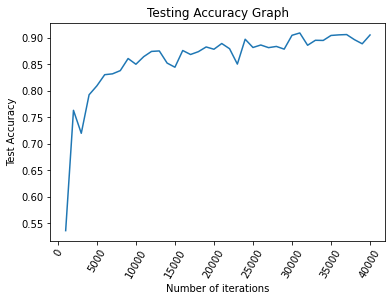

In [ ]:
# plotting the results
plt.plot(list(testingDictionary.keys()), list(testingDictionary.values()))
plt.ylabel('Test Accuracy')
plt.xlabel('Number of iterations')
plt.xticks(rotation=60)
plt.title('Testing Accuracy Graph')
plt.show()

# Displaying Images of Correctly Predicted Integers

In [ ]:
# imports for loading the test-dataset into DataLoader
from  torch.utils.data import DataLoader
from torchvision import *
from sklearn.metrics import confusion_matrix, classification_report

# loading the test data into DataLoader
testingData = DataLoader(datasets.MNIST('./datasets', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=128)

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw




Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Error visualization
# Displaying 5 samples for all 0-9 integers which were wrongly predicted by our model

# import for viewing images
from google.colab.patches import cv2_imshow

def findError(x_test, pred, actual, number):
  print("\nInteger:", number,"\n")
  count = 0
  for i in range(len(actual)):
    if count == 5:
      break
    if actual[i] == number and pred[i] == actual[i]:
      cv2_imshow((x_test.dataset[i][0].permute(1, 2, 0).numpy() * 255))
      print("Correct prediction at index =", i, ", Predicted Value :", pred[i])
      count += 1    

for x in range(10):
  findError(testingData, predictions, y_test, x)


Integer: 0 



Correct prediction at index = 3 , Predicted Value : 0


Correct prediction at index = 10 , Predicted Value : 0


Correct prediction at index = 13 , Predicted Value : 0


Correct prediction at index = 25 , Predicted Value : 0


Correct prediction at index = 28 , Predicted Value : 0

Integer: 1 



Correct prediction at index = 2 , Predicted Value : 1


Correct prediction at index = 5 , Predicted Value : 1


Correct prediction at index = 14 , Predicted Value : 1


Correct prediction at index = 29 , Predicted Value : 1


Correct prediction at index = 31 , Predicted Value : 1

Integer: 2 



Correct prediction at index = 1 , Predicted Value : 2


Correct prediction at index = 35 , Predicted Value : 2


Correct prediction at index = 38 , Predicted Value : 2


Correct prediction at index = 43 , Predicted Value : 2


Correct prediction at index = 47 , Predicted Value : 2

Integer: 3 



Correct prediction at index = 18 , Predicted Value : 3


Correct prediction at index = 30 , Predicted Value : 3


Correct prediction at index = 32 , Predicted Value : 3


Correct prediction at index = 44 , Predicted Value : 3


Correct prediction at index = 51 , Predicted Value : 3

Integer: 4 



Correct prediction at index = 4 , Predicted Value : 4


Correct prediction at index = 6 , Predicted Value : 4


Correct prediction at index = 19 , Predicted Value : 4


Correct prediction at index = 24 , Predicted Value : 4


Correct prediction at index = 27 , Predicted Value : 4

Integer: 5 



Correct prediction at index = 15 , Predicted Value : 5


Correct prediction at index = 23 , Predicted Value : 5


Correct prediction at index = 45 , Predicted Value : 5


Correct prediction at index = 52 , Predicted Value : 5


Correct prediction at index = 53 , Predicted Value : 5

Integer: 6 



Correct prediction at index = 11 , Predicted Value : 6


Correct prediction at index = 21 , Predicted Value : 6


Correct prediction at index = 22 , Predicted Value : 6


Correct prediction at index = 50 , Predicted Value : 6


Correct prediction at index = 54 , Predicted Value : 6

Integer: 7 



Correct prediction at index = 0 , Predicted Value : 7


Correct prediction at index = 17 , Predicted Value : 7


Correct prediction at index = 26 , Predicted Value : 7


Correct prediction at index = 34 , Predicted Value : 7


Correct prediction at index = 36 , Predicted Value : 7

Integer: 8 



Correct prediction at index = 61 , Predicted Value : 8


Correct prediction at index = 84 , Predicted Value : 8


Correct prediction at index = 110 , Predicted Value : 8


Correct prediction at index = 128 , Predicted Value : 8


Correct prediction at index = 134 , Predicted Value : 8

Integer: 9 



Correct prediction at index = 7 , Predicted Value : 9


Correct prediction at index = 9 , Predicted Value : 9


Correct prediction at index = 12 , Predicted Value : 9


Correct prediction at index = 16 , Predicted Value : 9


Correct prediction at index = 58 , Predicted Value : 9


# Classification Report & Confusion Matrix of our Neural Network

In [ ]:
predictions = np.array(predictions)
y_test = np.array(y_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.88      0.90      1032
           3       0.94      0.88      0.91      1010
           4       0.86      0.94      0.90       982
           5       0.90      0.86      0.88       892
           6       0.90      0.94      0.92       958
           7       0.81      0.95      0.88      1028
           8       0.94      0.81      0.87       974
           9       0.88      0.84      0.86      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 945    0    1    2    0    7   10    9    3    3]
 [   0 1116    5    1    1    2    3    4    3    0]
 [  13    3  905   10   18    2   15   38   23    5]
 [   4    0   29  889    1   29    2   33   11   12]
 [   0    4    1    0  920    0   14   10    1   32]
 [   8    2    1   19   21  768   26   24    6   17]
 [  10    3    7    1   23   11  896    7    0    0]
 [   0    9   20    1    5    0    0  980    0   13]
 [   8   10   10   20   21   33   24   30  785   33]
 [   8    5    1    3   55    6    1   76    3  851]]
